In [87]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import math

In [32]:
df = pd.read_csv('imdbhorrordata5kratingsv2.csv')

In [22]:
df

,Unnamed: 0,Title,Year,Rating,Link,Budget,Gross,Net,Date,Month
0,0,Bhool Bhulaiyaa,2007,7.4,/title/tt0995031/,NaN,19073095.0,NaN,2007-10-12,10.0
1,1,Paranormal Activity,2007,6.3,/title/tt1179904/,15000.0,193355800.0,193340800.0,2009-10-16,10.0
2,2,30 Days of Night,2007,6.6,/title/tt0389722/,30000000.0,75513170.0,45513170.0,2007-10-19,10.0
3,3,Boogeyman 2,2007,5.0,/title/tt0900357/,4500000.0,1798418.0,-2701582.0,2008-01-08,1.0
4,4,Saw IV,2007,5.9,/title/tt0890870/,10000000.0,139352633.0,129352633.0,2007-10-26,10.0
...,...,...,...,...,...,...,...,...,...,...
1095,1095,Crimes of the Future,2022,5.9,/title/tt14549466/,35000000.0,4520550.0,-30479450.0,2022-06-03,6.0
1096,1096,Nope,2022,6.9,/title/tt10954984/,68000000.0,171235592.0,103235592.0,2022-07-22,7.0
1097,1097,Prey (I),2022,7.2,/title/tt11866324/,65000000.0,NaN,NaN,2022-08-05,8.0
1098,1098,They/Them,2022,3.8,/title/tt14502344/,NaN,NaN,NaN,2022-08-05,8.0


In [20]:
df['Month']
# df['Month'] = pd.to_numeric(df['Date'][4:6].astype(float))

/var/folders/hz/32br96jn6sx2fpnqt9tbz4pw0000gn/T/ipykernel_29795/973924580.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['Date'][1:][2:]


3       2008-01-08
4       2007-10-26
5       2007-10-26
6       2007-11-16
7       2007-11-09
           ...    
1095    2022-07-22
1096    2022-08-05
1097    2022-08-05
1098    2022-08-19
1099    2022-08-19
Name: Date, Length: 1097, dtype: object

<BarContainer object of 12 artists>

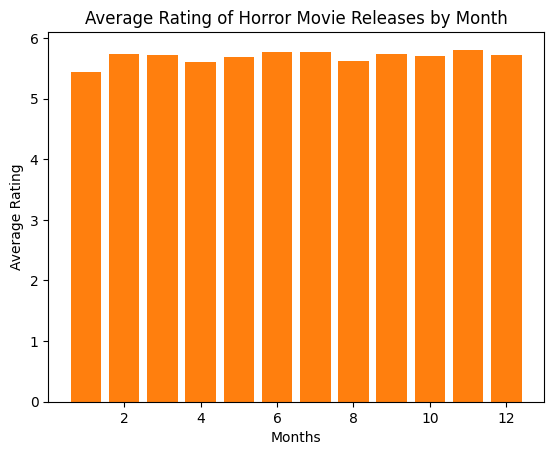

In [73]:
RatingTracker = {
  1 : [0, 0, 0], 2 : [0, 0, 0], 3 : [0, 0, 0], 4 : [0, 0, 0], 5 : [0, 0, 0], 6 : [0, 0, 0], 
  7 : [0, 0, 0], 8 : [0, 0, 0], 9 : [0, 0, 0], 10 : [0, 0, 0], 11 : [0, 0, 0], 12 : [0, 0, 0]
}
# [tracks total, tracks count, tracks mean]

RatingList = df['Rating'].tolist()
MonthList = df['Month'].tolist()

for i in range(len(RatingList)):
  if MonthList[i] in RatingTracker:
    RatingTracker[MonthList[i]][0] += RatingList[i]
    RatingTracker[MonthList[i]][1] += 1
avg = []
freq = []
# print(RatingTracker)
# loops through 1-12
for i in RatingTracker:
  RatingTracker[i][2] = (RatingTracker[i][0])/(RatingTracker[i][1])
  avg.append(RatingTracker[i][2])
  freq.append(RatingTracker[i][1])
    # print(RatingTracker[i][2])

# print(RatingTracker)

months = list(RatingTracker.keys())
plt.xlabel("Months")
plt.ylabel("Average Rating")
plt.title("Average Rating of Horror Movie Releases by Month")
plt.bar(months, avg)



<BarContainer object of 12 artists>

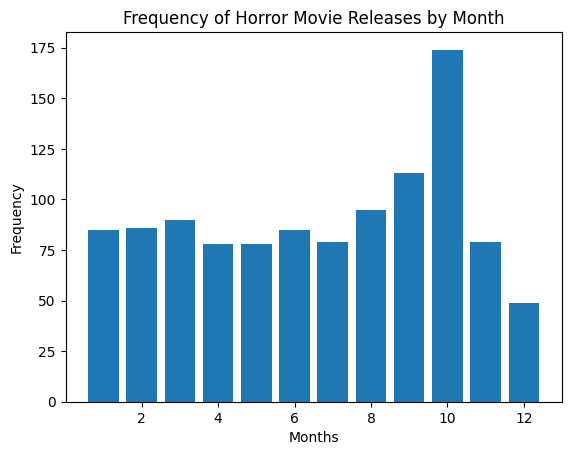

In [74]:
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title("Frequency of Horror Movie Releases by Month")
plt.bar(months, freq)

<BarContainer object of 2 artists>

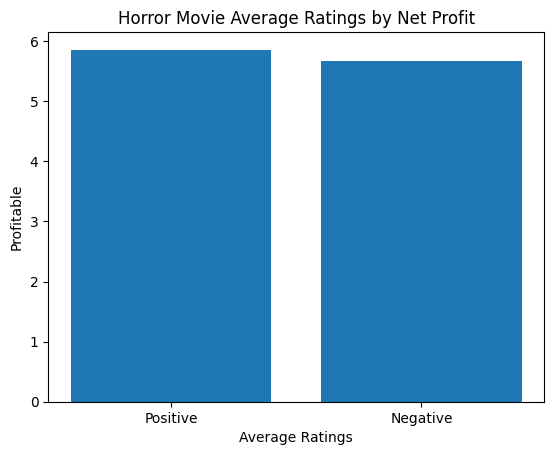

In [96]:
RevenueTracker = {
    "Positive" : [0, 0, 0],
    "Negative" : [0, 0, 0]
}
# ratings total, ratings count, ratings mean

RevenueList = df['Net'].tolist()
for i in range(len(RevenueList)):
    # print(i)
    if not math.isnan(RevenueList[i]):
        if RevenueList[i] > 0:
                RevenueTracker["Positive"][0] += RatingList[i]
                RevenueTracker["Positive"][1] += 1
        if RevenueList[i] < 0:
                RevenueTracker["Negative"][0] += RatingList[i]
                RevenueTracker["Negative"][1] += 1
                
        # print(RevenueList[i])
AvgRatingByNet = []
PosNeg = list(RevenueTracker.keys())
for i in RevenueTracker:
    AvgRatingByNet.append(RevenueTracker[i][0]/RevenueTracker[i][1])


plt.xlabel("Average Ratings")
plt.ylabel("Profitable")
plt.title("Horror Movie Average Ratings by Net Profit")
plt.bar(PosNeg, AvgRatingByNet)